In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [352]:
dataset=pd.read_csv('29-bestsellers_with_categories.csv')

In [353]:
missing_data=dataset.isnull().sum()
print("missing data:\n",missing_data)

missing data:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [354]:
# Select numeric columns
numeric_cols = dataset.select_dtypes(include=[np.number]).columns

# Find rows where any numeric column has value zero
zero_rows = dataset[(dataset[numeric_cols] == 0).any(axis=1)]

# Print the rows
zero_rows.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction


In [355]:
# Remove rows from dataset where any numeric column has value zero
dataset = dataset[(dataset[numeric_cols] != 0).all(axis=1)]
dataset.reset_index(drop=True, inplace=True)
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [356]:
# Group by Name and Author, keep average rating and price, max reviews, etc., and include latest Year
dataset = dataset.groupby(['Name', 'Author']).agg({
    'User Rating': 'mean',
    'Reviews': 'max',
    'Price': 'mean',
    'Year': 'max',
    'Genre': 'first',
}).reset_index()

In [357]:
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction


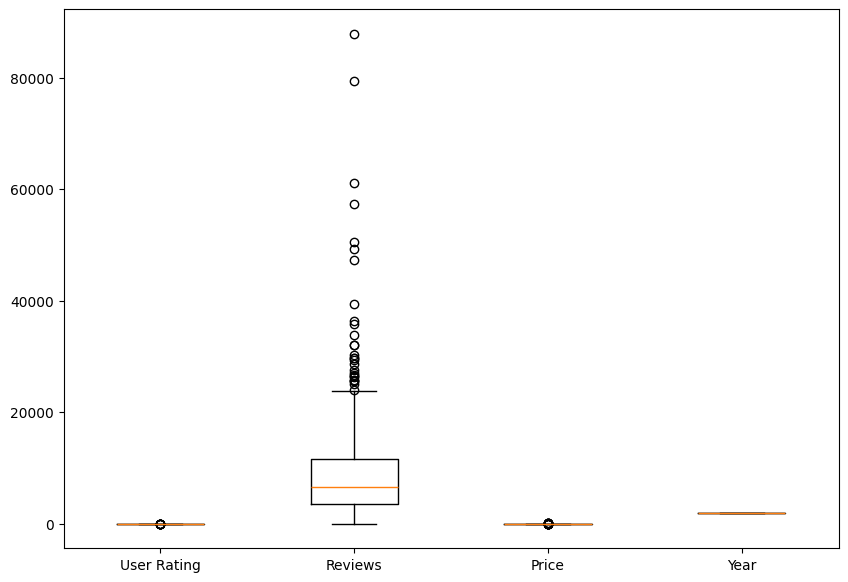

In [358]:
import matplotlib.pyplot as plt
import pandas as pd

numeric_data = dataset.select_dtypes(include=np.number)
plt.figure(figsize=(10, 7))
plt.boxplot([numeric_data[col] for col in numeric_data.columns], tick_labels=numeric_data.columns)
plt.show()

In [359]:
Q1 = dataset['Reviews'].quantile(0.25)
Q3 = dataset['Reviews'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR) for Reviews:", IQR)

Interquartile Range (IQR) for Reviews: 8162.5


In [360]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to remove outliers in 'Reviews'
filtered_dataset = dataset[(dataset['Reviews'] >= lower_bound) & (dataset['Reviews'] <= upper_bound)]
filtered_dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction


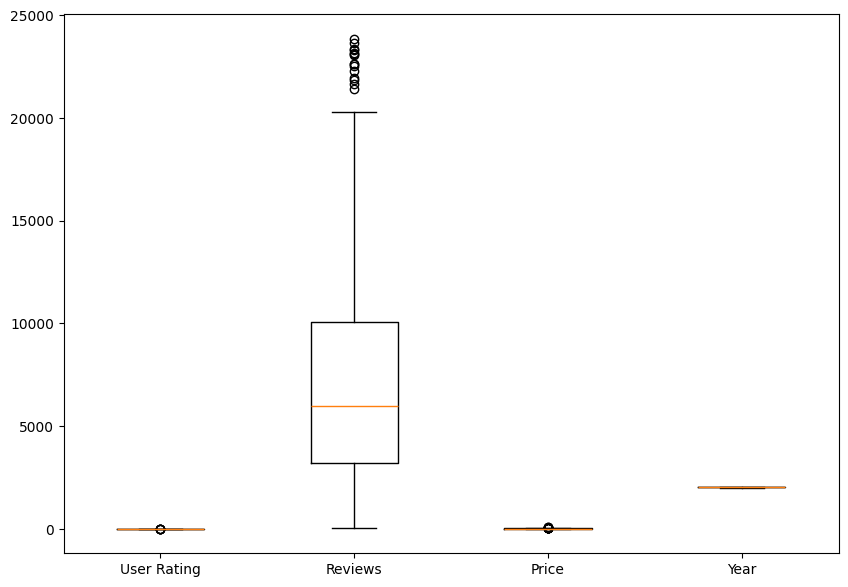

In [361]:
import matplotlib.pyplot as plt
import pandas as pd

numeric_data = filtered_dataset.select_dtypes(include=np.number)
plt.figure(figsize=(10, 7))
plt.boxplot([numeric_data[col] for col in numeric_data.columns], tick_labels=numeric_data.columns)
plt.show()

In [362]:
filtered_dataset = filtered_dataset.drop(columns=['Name'])
print("Dropped 'Name' column from both dataset and filtered_dataset.")

Dropped 'Name' column from both dataset and filtered_dataset.


In [363]:
missing_data=filtered_dataset.isnull().sum()
print("missing data:\n",missing_data)
filtered_dataset.head()

missing data:
 Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


,Author,User Rating,Reviews,Price,Year,Genre
0,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,Stephen King,4.6,2052,22.0,2011,Fiction
2,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,George Orwell,4.7,21424,6.0,2017,Fiction
4,National Geographic Kids,4.8,7665,12.0,2019,Non Fiction


In [364]:
import category_encoders as ce

# Select columns to encode and the target
cols_to_encode = ['Author']
target = 'User Rating'

# Make sure we have a copy, not a view, of the dataset
filtered_dataset = filtered_dataset.copy()

# Initialize and fit the target encoder
encoder = ce.TargetEncoder(cols=cols_to_encode)

# Fit and transform the filtered_dataset
filtered_dataset[cols_to_encode] = encoder.fit_transform(filtered_dataset[cols_to_encode], filtered_dataset[target])

# Ensure the encoded columns are float64
for col in cols_to_encode:
    filtered_dataset[col] = filtered_dataset[col].astype('float64')

print("Filtered dataset after encoding:")
print(filtered_dataset.head())

Filtered dataset after encoding:
     Author  User Rating  Reviews  Price  Year        Genre
0  4.625004          4.7    17350    8.0  2016  Non Fiction
1  4.598872          4.6     2052   22.0  2011      Fiction
2  4.625004          4.7    18979   15.0  2018  Non Fiction
3  4.625004          4.7    21424    6.0  2017      Fiction
4  4.638015          4.8     7665   12.0  2019  Non Fiction


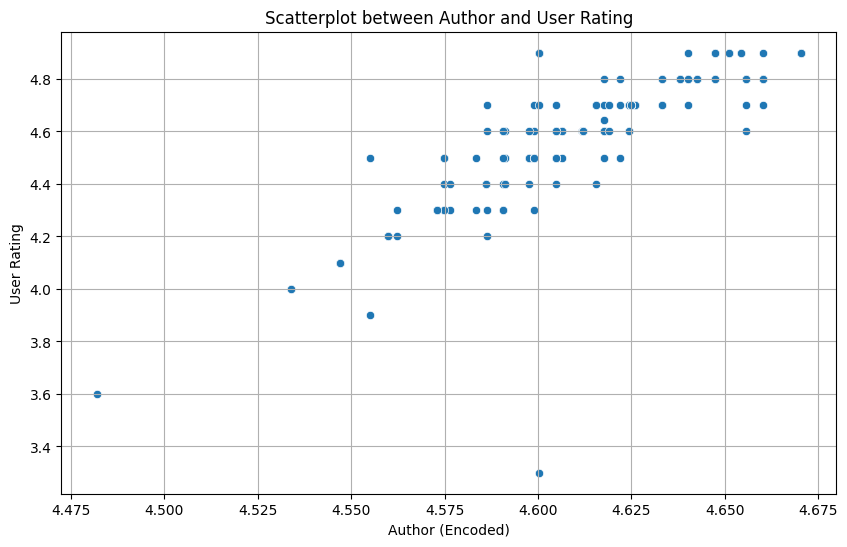

In [365]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_dataset['Author'], y=filtered_dataset['User Rating'])
plt.xlabel('Author (Encoded)')
plt.ylabel('User Rating')
plt.title('Scatterplot between Author and User Rating')
plt.grid(True)
plt.show()

In [366]:
print(filtered_dataset.dtypes)
print(dataset.dtypes)

Author         float64
User Rating    float64
Reviews          int64
Price          float64
Year             int64
Genre           object
dtype: object
Name            object
Author          object
User Rating    float64
Reviews          int64
Price          float64
Year             int64
Genre           object
dtype: object


In [367]:
is_author_numeric = pd.api.types.is_numeric_dtype(filtered_dataset['Author'])
print(f"Is 'Author' column numeric? {is_author_numeric}")

Is 'Author' column numeric? True


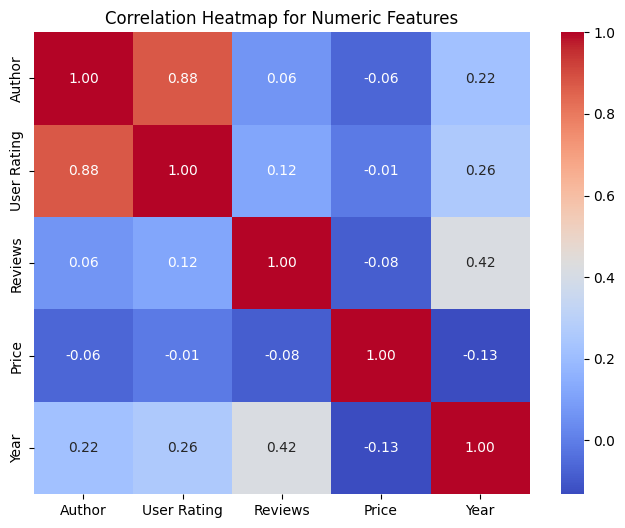

In [368]:
import seaborn as sns

# Compute the correlation matrix
corr = filtered_dataset.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

In [369]:
x=filtered_dataset.iloc[:,[0,2,3,4,5]].values
print(x)

[[4.625003909739867 17350 8.0 2016 'Non Fiction']
 [4.598872289954464 2052 22.0 2011 'Fiction']
 [4.625003909739867 18979 15.0 2018 'Non Fiction']
 ...
 [4.638014757176166 21625 9.0 2017 'Fiction']
 [4.6602917009717215 9413 8.0 2019 'Fiction']
 [4.625003909739867 14331 8.0 2019 'Non Fiction']]


In [370]:
y=filtered_dataset.iloc[:,[1]].values
print(y)

[[4.7       ]
 [4.6       ]
 [4.7       ]
 [4.7       ]
 [4.8       ]
 [4.4       ]
 [4.7       ]
 [4.7       ]
 [4.7       ]
 [4.6       ]
 [4.6       ]
 [4.6       ]
 [4.5       ]
 [4.6       ]
 [4.5       ]
 [4.6       ]
 [4.4       ]
 [4.5       ]
 [4.8       ]
 [3.9       ]
 [4.6       ]
 [4.3       ]
 [4.6       ]
 [4.7       ]
 [4.2       ]
 [4.6       ]
 [4.6       ]
 [4.8       ]
 [4.7       ]
 [4.8       ]
 [4.7       ]
 [4.7       ]
 [4.6       ]
 [4.5       ]
 [4.9       ]
 [4.6       ]
 [4.8       ]
 [4.5       ]
 [4.7       ]
 [4.7       ]
 [4.7       ]
 [4.3       ]
 [4.8       ]
 [4.8       ]
 [4.6       ]
 [4.8       ]
 [4.4       ]
 [4.6       ]
 [4.2       ]
 [4.3       ]
 [4.8       ]
 [4.6       ]
 [4.6       ]
 [4.5       ]
 [4.8       ]
 [4.8       ]
 [4.6       ]
 [4.5       ]
 [4.6       ]
 [4.7       ]
 [4.8       ]
 [4.9       ]
 [4.9       ]
 [4.9       ]
 [4.9       ]
 [4.9       ]
 [4.9       ]
 [4.8       ]
 [4.6       ]
 [4.5       ]
 [4.5       ]
 [4.3 

In [371]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 1.0 4.625003909739867 17350 8.0 2016]
 [1.0 0.0 4.598872289954464 2052 22.0 2011]
 [0.0 1.0 4.625003909739867 18979 15.0 2018]
 ...
 [1.0 0.0 4.638014757176166 21625 9.0 2017]
 [1.0 0.0 4.6602917009717215 9413 8.0 2019]
 [0.0 1.0 4.625003909739867 14331 8.0 2019]]


avoid dummy variable

In [372]:
x= x[: , 1:]
print(x)

[[1.0 4.625003909739867 17350 8.0 2016]
 [0.0 4.598872289954464 2052 22.0 2011]
 [1.0 4.625003909739867 18979 15.0 2018]
 ...
 [0.0 4.638014757176166 21625 9.0 2017]
 [0.0 4.6602917009717215 9413 8.0 2019]
 [1.0 4.625003909739867 14331 8.0 2019]]


In [373]:
from sklearn.preprocessing import StandardScaler

# Standard scale all columns of x except the first two columns
scaler = StandardScaler()
x[:, 2:] = scaler.fit_transform(x[:, 2:])
print(x)

[[1.0 4.625003909739867 1.70775556992414 -0.5290973817760144
  0.5898726211623734]
 [0.0 4.598872289954464 -0.9433410949933759 0.8457445041893393
  -0.8731972659726498]
 [1.0 4.625003909739867 1.9900562933618857 0.1583235612066625
  1.1751005760163826]
 ...
 [0.0 4.638014757176166 2.448600009885075 -0.43089438992134627
  0.882486598589378]
 [0.0 4.6602917009717215 0.33229771729959273 -0.5290973817760144
  1.4677145534433873]
 [1.0 4.625003909739867 1.184572092908453 -0.5290973817760144
  1.4677145534433873]]


In [374]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [375]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [376]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the target values for the test set
y_pred = regressor.predict(x_test)

# Calculate the R^2 score (accuracy for regression)
accuracy = r2_score(y_test, y_pred)
print("R^2 Score (Accuracy):", accuracy)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

R^2 Score (Accuracy): 0.8872769168391178
Mean Absolute Error: 0.0518
Mean Squared Error: 0.0060


In [377]:
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_squared_log_error,
    median_absolute_error,
    explained_variance_score
)

# Predict on the test set to match y_test
y_pred_test = regressor.predict(x_test)

print(f"R² Score: {r2_score(y_test, y_pred_test):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test):.4f}")
# Compute RMSE manually for compatibility
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Log Error: {mean_squared_log_error(y_test, y_pred_test):.4f}")
print(f"Median Absolute Error: {median_absolute_error(y_test, y_pred_test):.4f}")
print(f"Explained Variance Score: {explained_variance_score(y_test, y_pred_test):.4f}")

R² Score: 0.8873
Mean Absolute Error: 0.0518
Mean Squared Error: 0.0060
Root Mean Squared Error: 0.0777
Mean Squared Log Error: 0.0002
Median Absolute Error: 0.0282
Explained Variance Score: 0.8922


In [378]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, x, y, cv=5, scoring='r2')
print(f"Cross-Validated R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validated R²: 0.7918 ± 0.0882


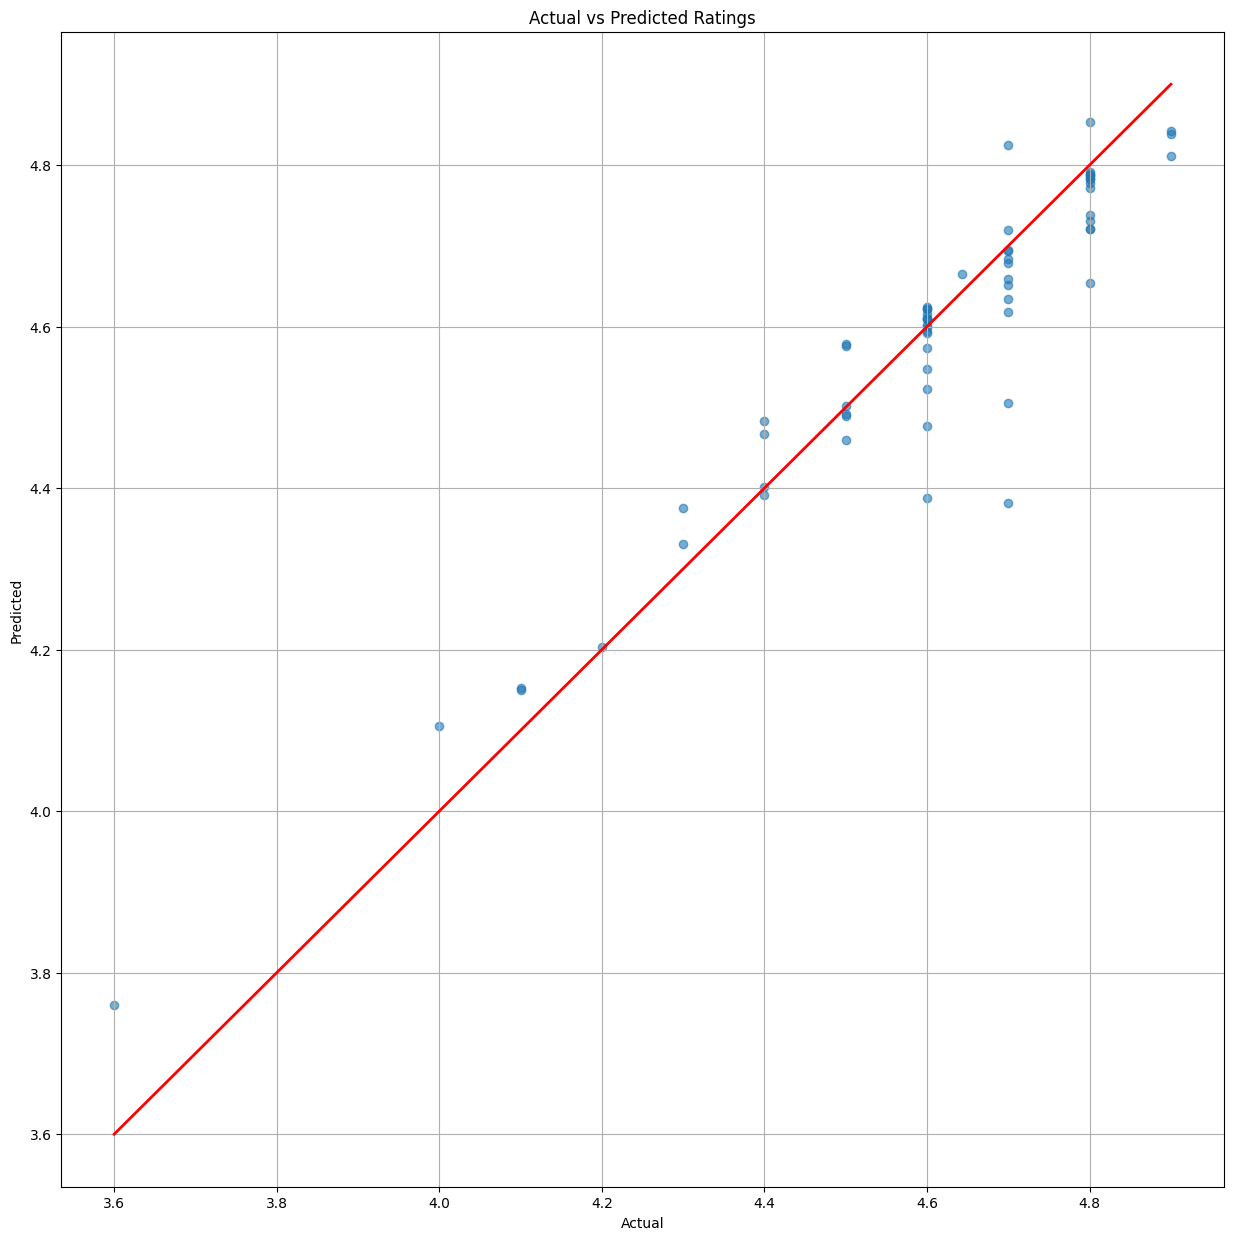

In [379]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Ratings')
plt.grid(True)
plt.show()

In [380]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the target values for the test set
y_pred = regressor.predict(x_train)

# Calculate the R^2 score (accuracy for regression)
accuracy = r2_score(y_train, y_pred)
print("R^2 Score (Accuracy):", accuracy)
mae = mean_absolute_error(y_train, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

R^2 Score (Accuracy): 0.744058455333455
Mean Absolute Error: 0.0547
Mean Squared Error: 0.0116


In [381]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, x, y, cv=5, scoring='r2')
print(f"Cross-Validated R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validated R²: 0.7918 ± 0.0882


In [382]:
print("Shape of x:", x.shape)

Shape of x: (315, 5)


In [383]:
ones=np.ones((315,1)).astype(int)
x=np.append(ones,x,axis=1)

In [384]:
print(x)

[[1 1.0 4.625003909739867 1.70775556992414 -0.5290973817760144
  0.5898726211623734]
 [1 0.0 4.598872289954464 -0.9433410949933759 0.8457445041893393
  -0.8731972659726498]
 [1 1.0 4.625003909739867 1.9900562933618857 0.1583235612066625
  1.1751005760163826]
 ...
 [1 0.0 4.638014757176166 2.448600009885075 -0.43089438992134627
  0.882486598589378]
 [1 0.0 4.6602917009717215 0.33229771729959273 -0.5290973817760144
  1.4677145534433873]
 [1 1.0 4.625003909739867 1.184572092908453 -0.5290973817760144
  1.4677145534433873]]


In [385]:
x_opt=x[:,:]
x_opt=x_opt.astype(np.float64)
print(x_opt)

[[ 1.          1.          4.62500391  1.70775557 -0.52909738  0.58987262]
 [ 1.          0.          4.59887229 -0.94334109  0.8457445  -0.87319727]
 [ 1.          1.          4.62500391  1.99005629  0.15832356  1.17510058]
 ...
 [ 1.          0.          4.63801476  2.44860001 -0.43089439  0.8824866 ]
 [ 1.          0.          4.6602917   0.33229772 -0.52909738  1.46771455]
 [ 1.          1.          4.62500391  1.18457209 -0.52909738  1.46771455]]


In [386]:
import statsmodels.api as sm
regressor_OLS=sm.OLS(y,x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     217.5
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           6.34e-99
Time:                        06:15:45   Log-Likelihood:                 271.87
No. Observations:                 315   AIC:                            -531.7
Df Residuals:                     309   BIC:                            -509.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.2423      0.989    -26.531      0.000     -28.189     -24.296
x1             0.0210      0.013      1.643      0.101      -0.004       0.046
x2             6.6831      0.214     31.229      0.000       6.262       7.104
x3             0.0129      0.007      1.893      0.059      -0.001       0.026
x4             0.0118      0.006      2.012      0.045       0.000       0.023
x5             0.0099      0.007      1.455      0.147      -0.003       0.023
==============================================================================
Omnibus:                      363.456   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49094.068
Skew:                          -4.655   Prob(JB):                         0.00
Kurtosis:                      63.447   Cond. No.                         829.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [387]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature in x_opt (excluding the intercept column)
vif_data = []
for i in range(1, x_opt.shape[1]):  # skip the intercept at index 0
    vif = variance_inflation_factor(x_opt, i)
    vif_data.append((i, vif))

print("Variance Inflation Factors (VIF):")
for idx, vif in vif_data:
    print(f"Feature {idx}: VIF = {vif:.2f}")

Variance Inflation Factors (VIF):
Feature 1: VIF = 1.17
Feature 2: VIF = 1.09
Feature 3: VIF = 1.37
Feature 4: VIF = 1.02
Feature 5: VIF = 1.38


In [388]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=1)
dt_regressor.fit(x_train, y_train)

# Predict on the test set
y_pred_dt = dt_regressor.predict(x_test)

# Evaluate the model
print(f"Decision Tree R² Score: {r2_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree MAE: {mean_absolute_error(y_test, y_pred_dt):.4f}")
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt):.4f}")

Decision Tree R² Score: 0.7643
Decision Tree MAE: 0.0580
Decision Tree MSE: 0.0126


In [389]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=1)
dt_regressor.fit(x_train, y_train)

# Predict on the test set
y_pred_dt = dt_regressor.predict(x_test)

# Evaluate the model
print(f"Decision Tree R² Score: {r2_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree MAE: {mean_absolute_error(y_test, y_pred_dt):.4f}")
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt):.4f}")

Decision Tree R² Score: 0.7643
Decision Tree MAE: 0.0580
Decision Tree MSE: 0.0126


In [390]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=1)
gb_regressor.fit(x_train, y_train.ravel())  # Flatten y_train to 1D

# Predict on the test set
y_pred_gb = gb_regressor.predict(x_test)

# Evaluate the model
print(f"Gradient Boosting R² Score: {r2_score(y_test, y_pred_gb):.4f}")
print(f"Gradient Boosting MAE: {mean_absolute_error(y_test, y_pred_gb):.4f}")
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, y_pred_gb):.4f}")

Gradient Boosting R² Score: 0.8451
Gradient Boosting MAE: 0.0533
Gradient Boosting MSE: 0.0083


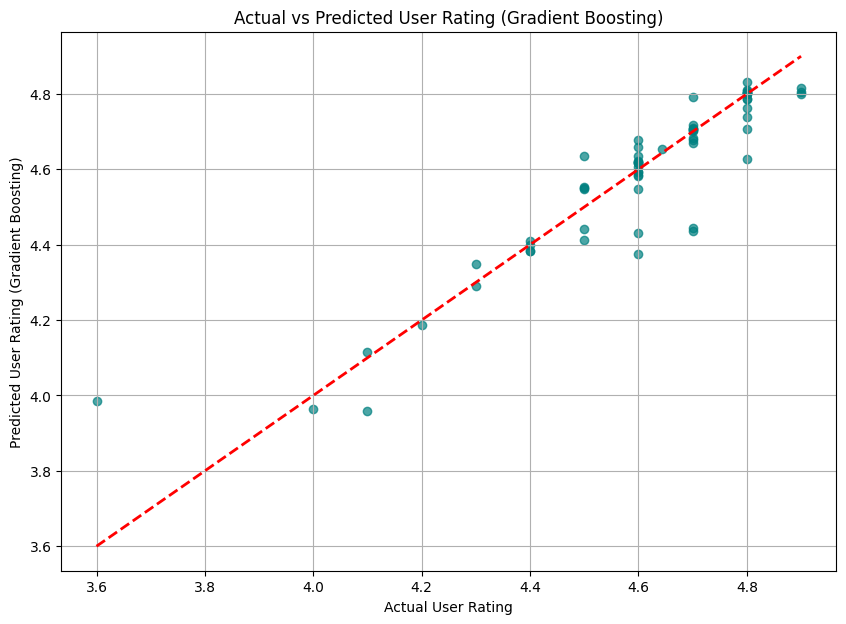

In [391]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_gb, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual User Rating')
plt.ylabel('Predicted User Rating (Gradient Boosting)')
plt.title('Actual vs Predicted User Rating (Gradient Boosting)')
plt.grid(True)
plt.show()

In [392]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for the Gradient Boosting Regressor
cv_scores_gb = cross_val_score(gb_regressor, x, y.ravel(), cv=5, scoring='r2')
print(f"Gradient Boosting Cross-Validated R²: {cv_scores_gb.mean():.4f} ± {cv_scores_gb.std():.4f}")

Gradient Boosting Cross-Validated R²: 0.2969 ± 0.7141


In [393]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train an XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=1, n_estimators=100)
xgb_regressor.fit(x_train, y_train.ravel())

# Predict on the test set
y_pred_xgb = xgb_regressor.predict(x_test)

# Evaluate the XGBoost model
print(f"XGBoost R² Score: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f}")
print(f"XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb):.4f}")

XGBoost R² Score: 0.7702
XGBoost MAE: 0.0528
XGBoost MSE: 0.0123


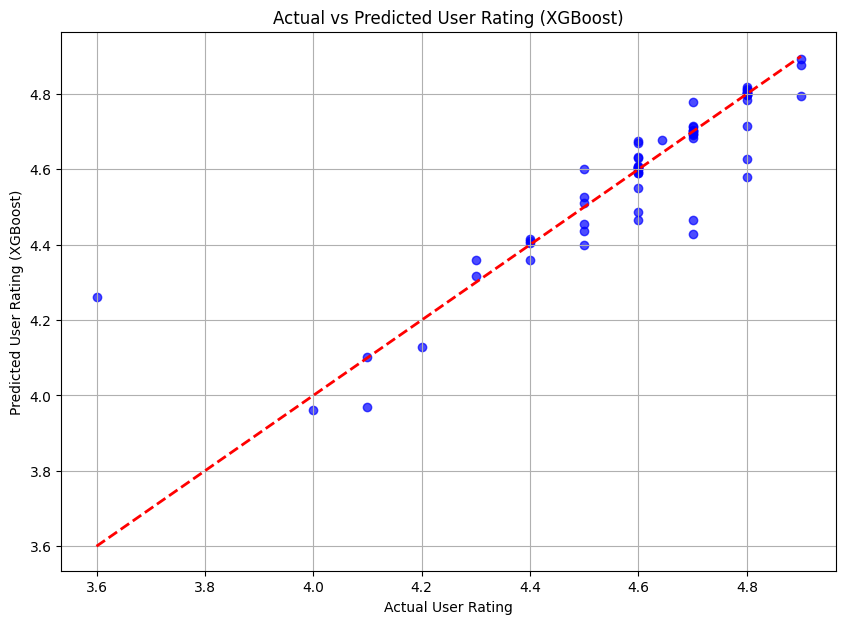

In [394]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual User Rating')
plt.ylabel('Predicted User Rating (XGBoost)')
plt.title('Actual vs Predicted User Rating (XGBoost)')
plt.grid(True)
plt.show()

In [395]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for the XGBoost Regressor
cv_scores_xgb = cross_val_score(xgb_regressor, x, y.ravel(), cv=5, scoring='r2')
print(f"XGBoost Cross-Validated R²: {cv_scores_xgb.mean():.4f} ± {cv_scores_xgb.std():.4f}")

XGBoost Cross-Validated R²: 0.2396 ± 0.8803


In [396]:
from sklearn.linear_model import BayesianRidge

# Train a Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(x_train, y_train.ravel())

# Predict on the test set
y_pred_bayes = bayesian_regressor.predict(x_test)

# Evaluate the Bayesian Ridge Regression model
print(f"Bayesian Ridge R² Score: {r2_score(y_test, y_pred_bayes):.4f}")
print(f"Bayesian Ridge MAE: {mean_absolute_error(y_test, y_pred_bayes):.4f}")
print(f"Bayesian Ridge MSE: {mean_squared_error(y_test, y_pred_bayes):.4f}")

Bayesian Ridge R² Score: 0.8858
Bayesian Ridge MAE: 0.0526
Bayesian Ridge MSE: 0.0061


In [397]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Use degree 2 for polynomial regression as a common starting point
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Fit the polynomial regression model
poly_regressor = LinearRegression()
poly_regressor.fit(x_train_poly, y_train)

# Predict on the test set
y_pred_poly = poly_regressor.predict(x_test_poly)

# Evaluate the model
print(f"Polynomial Regression R² Score: {r2_score(y_test, y_pred_poly):.4f}")
print(f"Polynomial Regression MAE: {mean_absolute_error(y_test, y_pred_poly):.4f}")
print(f"Polynomial Regression MSE: {mean_squared_error(y_test, y_pred_poly):.4f}")

Polynomial Regression R² Score: 0.9114
Polynomial Regression MAE: 0.0430
Polynomial Regression MSE: 0.0047


In [398]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=1, n_estimators=100)
rf_regressor.fit(x_train, y_train.ravel())

# Predict on the test set
y_pred_rf = rf_regressor.predict(x_test)

# Evaluate the Random Forest model
print(f"Random Forest R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")

Random Forest R² Score: 0.8382
Random Forest MAE: 0.0449
Random Forest MSE: 0.0087
